In [1]:
import csv #the csv library
with open('starbucks_drinkMenu_expanded.csv') as csvfile: #open the file
    #creates a csv reader object which stores the lines of the files in lists and lets us iterate over them
    drinksreader = csv.reader(csvfile) 
    headers = next(drinksreader, None) #skip over the headers
    for row in drinksreader:
        print(row)#take a look at what is being printed out

['Coffee', 'Brewed Coffee', 'Short', '3', '0.1', '0', '0', '0', '5', '0', '0', '0', '0.3', '0%', '0%', '0%', '0%', '175']
['Coffee', 'Brewed Coffee', 'Tall', '4', '0.1', '0', '0', '0', '10', '0', '0', '0', '0.5', '0%', '0%', '0%', '0%', '260']
['Coffee', 'Brewed Coffee', 'Grande', '5', '0.1', '0', '0', '0', '10', '0', '0', '0', '1', '0%', '0%', '0%', '0%', '330']
['Coffee', 'Brewed Coffee', 'Venti', '5', '0.1', '0', '0', '0', '10', '0', '0', '0', '1', '0%', '0%', '2%', '0%', '410']
['Classic Espresso Drinks', 'Caffè Latte', 'Short Nonfat Milk', '70', '0.1', '0.1', '0', '5', '75', '10', '0', '9', '6', '10%', '0%', '20%', '0%', '75']
['Classic Espresso Drinks', 'Caffè Latte', '2% Milk', '100', '3.5', '2', '0.1', '15', '85', '10', '0', '9', '6', '10%', '0%', '20%', '0%', '75']
['Classic Espresso Drinks', 'Caffè Latte', 'Soymilk', '70', '2.5', '0.4', '0', '0', '65', '6', '1', '4', '5', '6%', '0%', '20%', '8%', '75']
['Classic Espresso Drinks', 'Caffè Latte', 'Tall Nonfat Milk', '100', '0.2

In [2]:
import csv #the csv library
import matplotlib.pyplot as plt #The visualization library
import numpy as np #provides math functions
import pandas as pd


df = pd.read_csv('starbucks_drinkMenu_expanded.csv')
df.head()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75


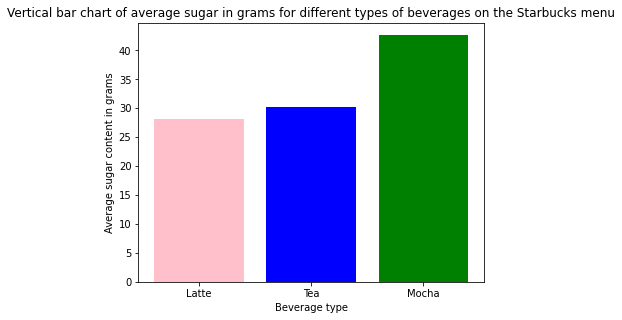

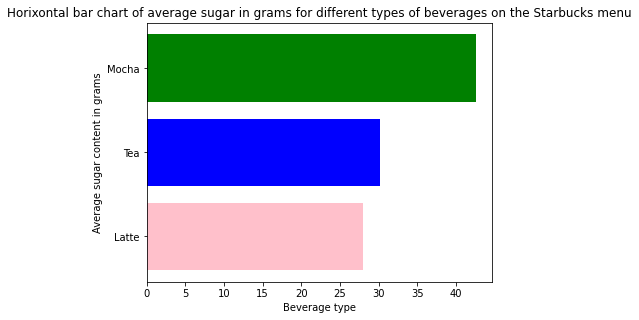

In [3]:
import csv #the csv library
import matplotlib.pyplot as plt #The visualization library
import numpy as np #provides math functions


with open('starbucks_drinkMenu_expanded.csv') as csvfile: #open the file
    #creates a csv reader object which stores the lines of the files in lists and lets us iterate over them
    drinksreader = csv.reader(csvfile) 
    headers = next(drinksreader, None) #skip over the headers
    
    #get the index that corresponds to the information we are interested in
    drink_category_index = headers.index("Beverage")
    sugars_index = headers.index(" Sugars (g)")
    
    #This is where we will store the sugar info for our different beverage types
    sugar_in_lattes = []
    sugar_in_teas = []
    sugar_in_mochas = []
    
    
    for row in drinksreader:
        drink_category = row[drink_category_index]
        sugar_grams = row[sugars_index]
        if 'Latte' in drink_category:
            sugar_in_lattes.append(float(sugar_grams))
        if 'Tea' in drink_category:
            sugar_in_teas.append(float(sugar_grams))
        if 'Mocha' in drink_category:
            sugar_in_mochas.append(float(sugar_grams))
        
    
    beverage_categories = ["Latte", 'Tea', 'Mocha']
    #average the sugar content
    average_sugar_in_lattes = np.mean(sugar_in_lattes)
    average_sugar_in_teas = np.mean(sugar_in_teas)
    average_sugar_in_mochas = np.mean(sugar_in_mochas)
    
    average_sugars = [average_sugar_in_lattes, average_sugar_in_teas, average_sugar_in_mochas]
    
    vertical_bar_chart_figure = plt.figure() #The outer container 
    vertical_bar_chart_axes = vertical_bar_chart_figure.add_axes([0.1, 0.2, 0.8, 0.9]) #The actual chart inside the figure
    #For more explanation: https://heartbeat.fritz.ai/introduction-to-matplotlib-data-visualization-in-python-d9143287ae39
    
    #Create the bar chart using the bar() method
    #The color argument lets us specify a list of colors for each of the bars
    vertical_bar_chart_axes.bar(beverage_categories, average_sugars, color=["pink", "blue", "green"])
    
    #Let's customize our chart!
    
    #Give it a title
    vertical_bar_chart_axes.set_title('Vertical bar chart of average sugar in grams for different types of beverages on the Starbucks menu')
    
    #Always label your axis or no one will be able to understand what the chart is showing
    vertical_bar_chart_axes.set_ylabel('Average sugar content in grams')
    vertical_bar_chart_axes.set_xlabel('Beverage type')
    
    #How would we create a horizontal bar chart? Use the barh() method!
    
    horizontal_bar_chart_figure = plt.figure() #The outer container 
    horizontal_bar_chart_axes = horizontal_bar_chart_figure.add_axes([0.1, 0.2, 0.8, 0.9]) #The actual chart inside the figure
    #For more explanation: https://heartbeat.fritz.ai/introduction-to-matplotlib-data-visualization-in-python-d9143287ae39
    
    #Create the bar chart using the barh() method
    #The color argument lets us specify a list of colors for each of the bars
    horizontal_bar_chart_axes.barh(beverage_categories, average_sugars, color=["pink", "blue", "green"])
    
    #Let's customize our chart!
    
    #Give it a title
    horizontal_bar_chart_axes.set_title('Horixontal bar chart of average sugar in grams for different types of beverages on the Starbucks menu')
    
    #Always label your axis or no one will be able to understand what the chart is showing
    horizontal_bar_chart_axes.set_ylabel('Average sugar content in grams')
    horizontal_bar_chart_axes.set_xlabel('Beverage type')

Text(0.5, 0, 'Beverage type')

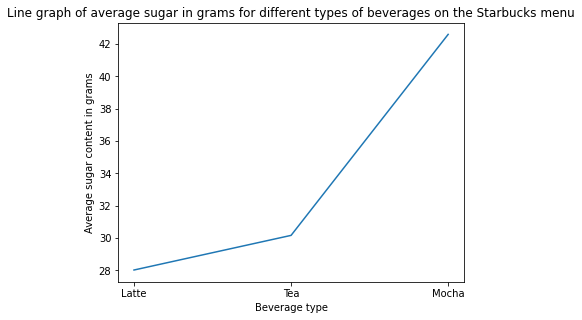

In [4]:
line_graph_figure = plt.figure() #The outer container 
line_graph_axes = line_graph_figure.add_axes([0.1, 0.2, 0.8, 0.9]) #The actual chart inside the figure
#For more explanation: https://heartbeat.fritz.ai/introduction-to-matplotlib-data-visualization-in-python-d9143287ae39

#Create the line graph using the plot() method
line_graph_axes.plot(beverage_categories, average_sugars)

#Let's customize our chart!

#Give it a title
line_graph_axes.set_title('Line graph of average sugar in grams for different types of beverages on the Starbucks menu')

#Always label your axis or no one will be able to understand what the chart is showing
line_graph_axes.set_ylabel('Average sugar content in grams')
line_graph_axes.set_xlabel('Beverage type')

In [6]:
#Make you charts here! Activity: make a bar chart and line graph for the average protein in grams for Cappuccinos, Macchiatos, and Smoothies¶
import csv #the csv library
import matplotlib.pyplot as plt #The visualization library
import numpy as np #provides math functions

with open('starbucks_drinkMenu_expanded.csv') as csvfile: #open the file
    #creates a csv reader object which stores the lines of the files in lists and lets us iterate over them
    drinksreader = csv.reader(csvfile) 
    headers = next(drinksreader, None) #skip over the headers
    
    #get the index that corresponds to the information we are interested in
    drink_category_index = headers.index("Beverage")
    protein_index = headers.index(" Protein (g)")
    
    #This is where we will store the sugar info for our different beverage types
    protein_in_cappuccinos = []
    protein_in_macchiatos = []
    protein_in_smoothies = []
    
    
    for row in drinksreader:
        drink_category = row[drink_category_index]
        protein_grams = row[protein_index]
        if 'Cappuccinos' in drink_category:
            protein_in_cappuccinos.append(float(protein_grams))
        if 'Macchiatos' in drink_category:
            protein_in_macchiatos.append(float(protein_grams))
        if 'Smoothies' in drink_category:
            protein_in_smoothies.append(float(protein_grams))
        
    
    beverage_categories = ['Cappuccinos', 'Macchiatos', 'Smoothies']
    #average the sugar content
    average_protein_in_cappuccinos = np.mean(protein_in_cappuccinos)
    average_protein_in_macchiatos = np.mean(protein_in_macchiatos)
    average_protein_in_mochas = np.mean(protein_in_smoothies)
    
    average_protien = [average_protein_in_cappuccinos, average_protein_in_macchiatos, average_protein_in_smoothies]
    
    vertical_bar_chart_figure = plt.figure() #The outer container 
    vertical_bar_chart_axes = vertical_bar_chart_figure.add_axes([0.1, 0.2, 0.8, 0.9]) #The actual chart inside the figure
    #For more explanation: https://heartbeat.fritz.ai/introduction-to-matplotlib-data-visualization-in-python-d9143287ae39
    
    #Create the bar chart using the bar() method
    #The color argument lets us specify a list of colors for each of the bars
    vertical_bar_chart_axes.bar(beverage_categories, average_protien, color=["pink", "blue", "green"])
    
    #Let's customize our chart!
    
    #Give it a title
    vertical_bar_chart_axes.set_title('Vertical bar chart of average protien in grams for different types of beverages on the Starbucks menu')
    
    #Always label your axis or no one will be able to understand what the chart is showing
    vertical_bar_chart_axes.set_ylabel('Average protien content in grams')
    vertical_bar_chart_axes.set_xlabel('Beverage type')
    
    #How would we create a horizontal bar chart? Use the barh() method!
    
    horizontal_bar_chart_figure = plt.figure() #The outer container 
    horizontal_bar_chart_axes = horizontal_bar_chart_figure.add_axes([0.1, 0.2, 0.8, 0.9]) #The actual chart inside the figure
    #For more explanation: https://heartbeat.fritz.ai/introduction-to-matplotlib-data-visualization-in-python-d9143287ae39
    
    #Create the bar chart using the barh() method
    #The color argument lets us specify a list of colors for each of the bars
    horizontal_bar_chart_axes.barh(beverage_categories, average_protien, color=["pink", "blue", "green"])
    
    #Let's customize our chart!
    
    #Give it a title
    horizontal_bar_chart_axes.set_title('Horixontal bar chart of average protien in grams for different types of beverages on the Starbucks menu')
    
    #Always label your axis or no one will be able to understand what the chart is showing
    horizontal_bar_chart_axes.set_ylabel('Average protien content in grams')
    horizontal_bar_chart_axes.set_xlabel('Beverage type')

ValueError: ' Protein (g)' is not in list